In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
%matplotlib inline

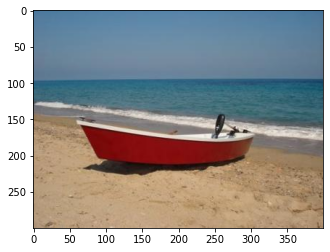

In [4]:
I = cv2.imread('bote.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.imshow(I, cmap='gray')

In [6]:
medias_historial=[]
Ir=I.astype(float)
size_image=I.shape
Ir=np.reshape(I,(size_image[0]*size_image[1],3))
num_classes=4
num_iteraciones=30
medias=np.zeros((3,num_classes))
distancia=np.zeros((size_image[0]*size_image[1],num_classes))
for i in range(num_classes):
    medias[:,i]=Ir[random.randint(0, size_image[0]*size_image[1]-1),:]
    # medias[:,i]=[random.randint(0, 255),random.randint(0, 255),random.randint(0, 255)]
medias_historial.append(medias)
    # print(np.transpose(medias))
for epoca in range(num_iteraciones):
    for i in range(num_classes):
        distancia[:,i]=np.sqrt(np.sum((Ir-medias[:,i])**2, axis = 1)) 
    assi=np.argmin(distancia,axis=1) 
    
    for i in range(num_classes):
        medias[:,i]=np.mean(Ir[np.argwhere(assi == i),:],axis=0) 
    medias_historial.append(medias)        
    # print(np.transpose(medias))

print(np.transpose(medias))    
assi=np.reshape(assi,(size_image[0],size_image[1]))

[[29.42787794 47.59201614 32.83291032 65.36818798]
 [29.42787794 47.59201614 32.83291032 65.36818798]
 [29.42787794 47.59201614 32.83291032 65.36818798]
 ...
 [83.38465087 73.86474125 81.01234474 48.14561247]
 [81.10487038 73.55949973 79.04429138 43.73785546]
 [85.79627032 74.83314774 83.20456718 52.44044241]]
[0 0 0 ... 3 3 3]
[[ 15.93774637  77.74044803  33.24222276 103.54973955]
 [ 15.93774637  77.74044803  33.24222276 103.54973955]
 [ 15.93774637  77.74044803  33.24222276 103.54973955]
 ...
 [105.71508202  70.3718803   86.01817611  22.32759224]
 [101.44155744  73.75618943  84.73916203  13.95291054]
 [109.50757854  68.33726935  87.6461491   29.14775301]]
[0 0 0 ... 3 3 3]
[[ 46.05897396 148.24509845  32.98071149 110.02835793]
 [ 46.05897396 148.24509845  32.98071149 110.02835793]
 [ 46.05897396 148.24509845  32.98071149 110.02835793]
 ...
 [117.19752303  90.74752466  86.02642211  13.70530395]
 [111.01491349  98.91988655  84.71281513   6.95801931]
 [122.36019824  84.27982352  87.6810

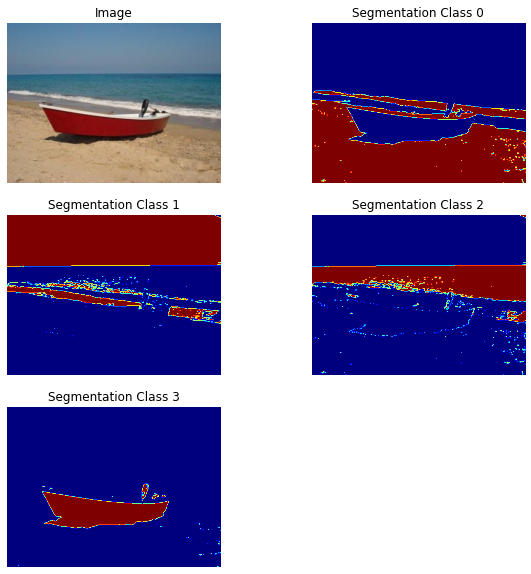

In [5]:
nf=np.ceil((num_classes+1)/2).astype(int)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(nf, 2, 1)
plt.imshow(I, cmap='gray',vmin=0,vmax=255)
plt.axis('off')
plt.title('Image')
for i in range(num_classes):
    ax = fig.add_subplot(nf, 2, i+2)
    plt.imshow(assi==i, cmap='jet')
    plt.axis('off')
    plt.title('Segmentation '+'Class '+str(i))

(3, 4)
0
1
2
3


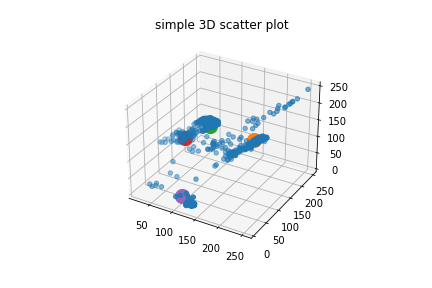

In [6]:
%matplotlib widget

n_data=500
randomlist = random.sample(range(0, size_image[0]*size_image[1]), n_data)
muestra=Ir[randomlist,:]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(muestra[:,0], muestra[:,1],muestra[:,2])
plt.title("simple 3D scatter plot")
print(medias.shape)

for i in range(num_classes):
    print(i)
    ax.scatter3D(medias[0,i],medias[1,i],medias[2,i], s=200, alpha=1)  
    
# show plot
plt.show()